# <font color='#6a5acd'>Statistical Analysis with Python</font>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question
Based on Kenya's Demographic Health Survey 2014, what are the main factors that can help determine the number of children born by women of reproductive age in Kenya? 

### b) Defining the Metric for Success

From the data examination, if we are able to come up with at least one factor that will determine child birth, we will have addressed the concern for our research.

### c) Understanding the context 
The Demographic and Health Surveys (DHS) Program has collected, analyzed, and disseminated accurate and representative data on population, health, HIV, and nutrition through more than 400 surveys in over 90 countries.

The respondent for the provided data is a woman of a reproductive age.

### d) Recording the Experimental Design

1. Business Understanding : Understanding and assessing the business situation and goals.

2. Data Understanding and Exploration
  * Prerequisites
     * Load requisite libraries 
     * Load and preview datasets.
  * Data requirements understanding (Select the fundamental variables / features relevant to the business problem).

3. Data Preparation
  * Data quality assessment (Accuracy, Completeness, Consistency, Currency, Relevance, Validity and Uniqueness).
  * Data cleaning
  * Data integration and formatting
  * Data transformation (merging datasets, reformatting fields, filtering records, ...) and enrichment (feature engineering)

4. Deployment / Solution Implementation / Reporting

### e) Data Relevance
The given dataset (sanitized) has relevant demographic and health data (population, health, HIV, and nutrition) which will help in answering the research question. We will however need to find out the importance of these features relative to the specific research question.
****
**Dataset Glossary**

* CASEID: Unique Case identifier
* V010: Respondents Year of Birth
* V012: Respondents current age
* V025: Type of residence
* V024: Region
* V106: The highest level of education
* V152: Age of household head
* V201: Total children ever born

## <font color='#2F4F4F'>2. Data Understanding and Exploration</font>

In [ ]:
# loading libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the main data set
# kdhs2014 = pd.read_csv('kdhs2014_childfile.csv')
kdhs2014 = pd.read_csv('https://bit.ly/khds_dataset',)
kdhs2014.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,71,89,123,125,133,135,136,145,146,147,148,203,206,291,292,293,294,295,296,297,298,299,300,301,343,344,392,413,430,439,449,450,451,453,461,463,468,502,517,549,551,553,554,578,664,668,672,676,684,691,817,821,838,849,850,851,852,882,883,884,885,886,887,888,889,890,891,892,893,904,905,912,914,929,933,934,935,936,979,980,981,1007,1008,1009,1010,1011,1021,1022,1023) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CASEID,MIDX,V000,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,V013,V014,V015,V016,V017,V018,V019,V019A,V020,V021,V022,V023,V024,V025,V026,V027,V028,V029,V030,V031,V032,V034,V040,V042,...,SYPN1,SPN2,SDPN2,SMPN2,SYPN2,SPN3,SDPN3,SMPN3,SYPN3,SRV1,SDRV1,SMRV1,SYRV1,SRV2,SDRV2,SMRV2,SYRV2,SYF,SDYF,SMYF,SYYF,SAMZ,SDAMZ,SMAMZ,SYAMZ,S521BA,S521BB,S521BC,S521BD,S521BE,S521BX,S539AA,S539AB,S539AC,S539AD,S539AE,S539AF,S539AG,S539AY,S522C
0,1,0001019 02,1,KE6,1,19,2,1,5476381,8,2014,1376,8,1991,1100,23,20-24,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,178,7,175,177,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0001019 03,1,KE6,1,19,3,1,5476381,8,2014,1376,2,1991,1094,23,20-24,Month and year - information complete,Completed,31,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,3,178,7,175,177,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0001033 02,1,KE6,1,33,2,1,5476381,8,2014,1376,8,1988,1064,26,25-29,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,179,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0001033 02,2,KE6,1,33,2,1,5476381,8,2014,1376,8,1988,1064,26,25-29,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,179,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0001037 02,1,KE6,1,37,2,1,5476381,8,2014,1376,2,1992,1106,22,20-24,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,178,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the shape of the dataset

kdhs2014.shape

(20964, 1100)

In [ ]:
# Selecting only the relevant columns

df_kdhs = kdhs2014[['CASEID', 'V010', 'V012', 'V025', 'V024', 'V106', 'V152', 'V201']]
df_kdhs.head()

,CASEID,V010,V012,V025,V024,V106,V152,V201
0,0001019 02,1991,23,Urban,Nairobi,Secondary,52.0,2
1,0001019 03,1991,23,Urban,Nairobi,Secondary,52.0,1
2,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
3,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
4,0001037 02,1992,22,Urban,Nairobi,Primary,29.0,3


In [ ]:
# We will proceed to give descriptive labels (rename) to these features.

new_labels = ['case_id', 'birth_year', 'age', 'residence', 'region', 'education', 'age_head', 'total_kids']
df_kdhs.columns = new_labels
df_kdhs.head()

,case_id,birth_year,age,residence,region,education,age_head,total_kids
0,0001019 02,1991,23,Urban,Nairobi,Secondary,52.0,2
1,0001019 03,1991,23,Urban,Nairobi,Secondary,52.0,1
2,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
3,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
4,0001037 02,1992,22,Urban,Nairobi,Primary,29.0,3


## <font color='#2F4F4F'>3. Data Preparation</font>

In [ ]:
# finding and dealing with null values

df_kdhs.isnull().sum()

case_id       0
birth_year    0
age           0
residence     0
region        0
education     0
age_head      1
total_kids    0
dtype: int64

In [ ]:
# We only have 1 record in the entire dataset with null entry in the age of the household column.
# for completeness of our data, we choose to retain this record and fill the null with the average age of the households.

avg_age_head = df_kdhs['age_head'].mean()
avg_age_head

37.958116681772644

In [ ]:
df_kdhs['age_head'].fillna(avg_age_head, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# Performing data conversion. first check the datatypes for all columns

df_kdhs.dtypes

case_id        object
birth_year      int64
age             int64
residence      object
region         object
education      object
age_head      float64
total_kids      int64
dtype: object

*From the above analysis of the datatypes, we notice that there is no need for datatype conversion as all fields' datatypes conform to their respective needs.*

In [ ]:
# dropping duplicates. Let's check if we have any duplicates in the dataset.
# specific reference should be the duplication of unique case_id

df_kdhs.duplicated().any()

True

We notice that there are duplicated records in the dataset and we will find out which they are before we drop them (or handle them as appropriate)

In [ ]:
# Read the duplicated records in a separate dataframe and sample them.

df_duplicated = df_kdhs[df_kdhs.duplicated()]
df_duplicated

,case_id,birth_year,age,residence,region,education,age_head,total_kids
3,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
5,0001037 02,1992,22,Urban,Nairobi,Primary,29.0,3
8,0001059 02,1992,21,Urban,Nairobi,Secondary,22.0,3
9,0001059 02,1992,21,Urban,Nairobi,Secondary,22.0,3
17,0002016 02,1990,24,Urban,Nairobi,Secondary,31.0,2
...,...,...,...,...,...,...,...,...
20951,1611139 04,1988,25,Urban,Western,Higher,57.0,2
20955,1612008 02,1987,26,Urban,Western,Higher,28.0,2
20957,1612015 02,1989,25,Urban,Western,Primary,24.0,3
20959,1612041 02,1988,25,Urban,Western,Primary,28.0,2


In [ ]:
df_kdhs.case_id.value_counts()

     1059091 02    5
     1037007 01    5
     0751029 02    5
     0703029 02    4
     0792017 02    4
                  ..
     1506096 02    1
     0756013 01    1
     1080069 02    1
     0867048 02    1
     0844001 02    1
Name: case_id, Length: 14949, dtype: int64

*From the above, we notice that we have a total of 6,015 duplicated records, some as many as five times. We confirm this with the unique record identifier field `case_id`. We will therefore proceed to drop them.*

In [ ]:
# we will drop the duplicates and check the final shape of the recordset.

df_kdhs = df_kdhs.drop_duplicates()
df_kdhs.shape

(14949, 8)

In [ ]:
# calculating the mean, median, and mode of the V012 variable i.e age of the respondent

#df_kdhs[df_kdhs['age'], df_kdhs['age_head'], df_kdhs['total_kids']].describe()
print('Population statistics for the age \n\n')
print( 'Mean : ', round(df_kdhs['age'].mean(),2), '\n')
print( 'Median : ', df_kdhs['age'].median(), '\n')
print( 'Mode : ', df_kdhs['age'].mode(), '\n')

Population statistics for the age 


Mean :  28.88 

Median :  28.0 

Mode :  0    25
dtype: int64 



In [ ]:
# calculating the mean, median, and mode of the V152 variable i.e. Age of household head

print('Population statistics for the age of household head \n\n')
print( 'Mean : ', round(df_kdhs['age_head'].mean(),2), '\n')
print( 'Median : ', df_kdhs['age_head'].median(), '\n')
print( 'Mode : ', df_kdhs['age_head'].mode(), '\n')

Population statistics for the age of household head 


Mean :  38.34 

Median :  35.0 

Mode :  0    30.0
dtype: float64 



In [ ]:
# calculating the mean, median, and mode of the V201 variable i.e. Total children ever born

print('Population statistics for the Total Children Ever Born \n\n')
print( 'Mean : ', round(df_kdhs['total_kids'].mean(),2), '\n')
print( 'Median : ', df_kdhs['total_kids'].median(), '\n')
print( 'Mode : ', df_kdhs['total_kids'].mode(), '\n')

Population statistics for the Total Children Ever Born 


Mean :  3.48 

Median :  3.0 

Mode :  0    1
dtype: int64 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


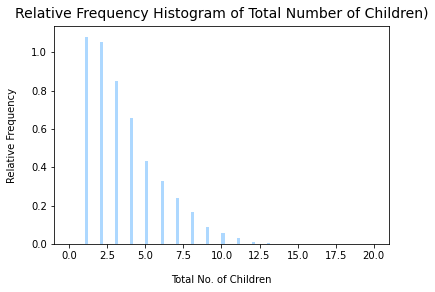

In [ ]:
# plot a histogram for total_kids variable.

sns.distplot(df_kdhs['total_kids'], bins=100, kde=False, norm_hist=True, color='#339FFF', hist_kws={"range": [0, 20]})
plt.xlabel("Total No. of Children", labelpad=14)
plt.ylabel("Relative Frequency", labelpad=14)
plt.title("Relative Frequency Histogram of Total Number of Children)", fontsize=14, y=1.01) 
plt.show()

*For the total number of children ever born, median would be more appropriate for measuring central tendency as, from the above histogram, we notice that the distribution of this parameter is skewed to the right.*

In [ ]:
# calculating the range, IQR, and standard deviation of the V012 variable

# Range : The difference between the largest value and the smallest value in the given data set.
range = df_kdhs['age'].max() - df_kdhs['age'].min()
print("The range of respondents' age is ",range, '\n')

#IQR
# First quartile (Q1) 
Q1 = np.percentile(df_kdhs['age'], 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(df_kdhs['age'], 75, interpolation = 'midpoint') 
  
# Interquartile range (IQR) 
IQR = Q3 - Q1
print("The IQR of respondents' age is ",IQR, '\n')
print("The Quartile Deviation of age for the household head is ",IQR/2, '\n')

# Standard Deviation
print("The Standard Deviation of respondents' age is ",round(np.std(df_kdhs['age']),2))

The range of respondents' age is  34 

The IQR of respondents' age is  10.0 

The Quartile Deviation of age for the household head is  5.0 

The Standard Deviation of respondents' age is  6.79


In [ ]:
# calculating the range, IQR, and standard deviation of the V152 variable

# Range
range = df_kdhs['age_head'].max() - df_kdhs['age_head'].min()
print("The range of age for the household head is ",range, '\n')


#IQR
# First quartile (Q1) 
Q1 = np.percentile(df_kdhs['age_head'], 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(df_kdhs['age_head'], 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
print("The IQR of age for the household head is ",IQR, '\n')
print("The Quartile Deviation of age for the household head is ",IQR/2, '\n')

# Standard Deviation
print("The Standard Deviation of age for the household head is ",round(np.std(df_kdhs['age_head']),2))

The range of age for the household head is  80.0 

The IQR of age for the household head is  14.0 

The Quartile Deviation of age for the household head is  7.0 

The Standard Deviation of age for the household head is  12.43


*The quartile deviation and IQR for the age of household head is higher hence higher variability (dispersion of the points around the mean) compared to that of the respondents' age <br> This also follows from the fact that household age has higher range.*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


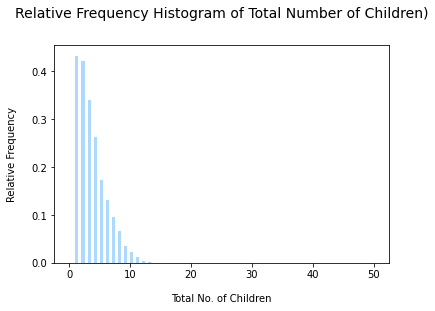

In [ ]:
# histogram of Total No. of Children variable

sns.distplot(df_kdhs['total_kids'], bins=100, kde=False, norm_hist=True, color='#339FFF', hist_kws={"range": [0, 50]})
plt.xlabel("Total No. of Children", labelpad=14)
plt.ylabel("Relative Frequency", labelpad=14)
plt.title("Relative Frequency Histogram of Total Number of Children)", fontsize=14, y=1.1) 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


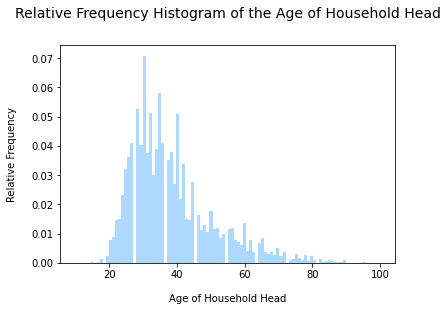

In [ ]:
# histogram of V152 variable

sns.distplot(df_kdhs['age_head'], bins=100, kde=False, norm_hist=True, color='#339FFF', hist_kws={"range": [10, 100]})
plt.xlabel("Age of Household Head", labelpad=14)
plt.ylabel("Relative Frequency", labelpad=14)
plt.title("Relative Frequency Histogram of the Age of Household Head", fontsize=14, y=1.1) 
plt.show()

Though both are skewed, the age of respondents is more skewed to the right than that of the household head.

In [ ]:
# displaying the frequency table of the V024 variable

df_kdhs['region'].value_counts()

Rift Valley      4760
Eastern          2299
Nyanza           2085
Coast            1857
Western          1398
Central          1197
North Eastern     925
Nairobi           428
Name: region, dtype: int64

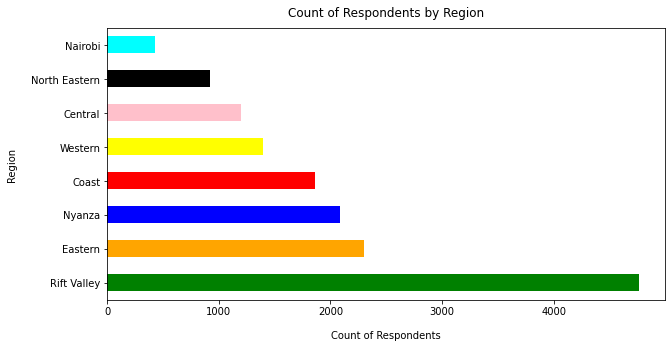

In [ ]:
# plotting the bar chart of the V024 frequency table

#df_kdhs['region'].value_counts().plot(kind='bar')
df_kdhs['region'].value_counts().plot(kind='barh', figsize=(10, 5), color=['green', 'orange', 'blue','red','yellow','pink','black','cyan'])
plt.xlabel("Count of Respondents", labelpad=14)
plt.ylabel("Region", labelpad=14, )
plt.title("Count of Respondents by Region", y=1.02);

In [ ]:
# displaying the frequency table of the V106 variable

df_kdhs['education'].value_counts()

Primary         7843
Secondary       3210
No education    2790
Higher          1106
Name: education, dtype: int64

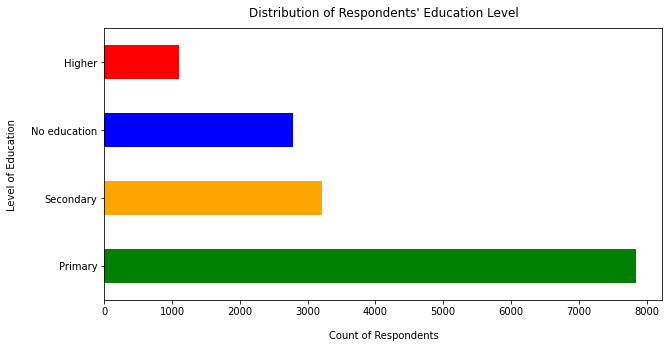

In [ ]:
# plotting the bar chart of the V106 frequency table

df_kdhs['education'].value_counts().plot(kind='barh', figsize=(10, 5), color=['green', 'orange', 'blue','red'])
plt.xlabel("Count of Respondents", labelpad=14)
plt.ylabel("Level of Education", labelpad=14, )
plt.title("Distribution of Respondents' Education Level", y=1.02);

In [ ]:
# Pick unique regions from the dataset.

df_kdhs['residence'].unique()

array(['Urban', 'Rural'], dtype=object)

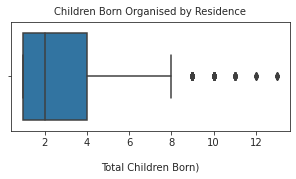

In [ ]:
# plotting a boxplot of children born by residence
#
plt.figure(figsize=(5,2))
sns.set_style('ticks')


sns.boxplot(x = df_kdhs[df_kdhs['residence']=='Urban']['total_kids']) 
plt.title("Children Born Organised by Residence", fontsize=10, y=1.01) 
plt.xlabel("Total Children Born)", labelpad=14)
plt.show()


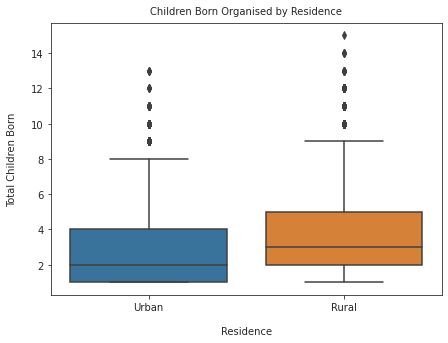

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='residence', y='total_kids', data = df_kdhs, saturation=0.65) 
plt.title("Children Born Organised by Residence", fontsize=10, y=1.01) 
plt.ylabel("Total Children Born", labelpad=14)
plt.xlabel("Residence", labelpad=14)
plt.show()

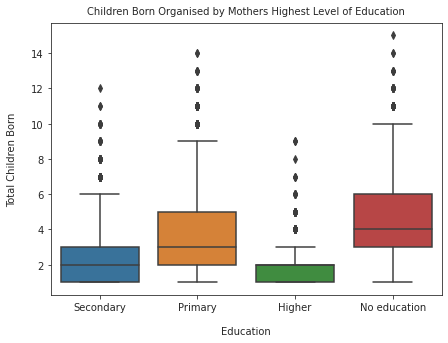

In [ ]:
# plotting a boxplot of V201 by V106 ( Total Children born vs Education respectively)

plt.figure(figsize=(7, 5))
sns.boxplot(x='education', y='total_kids', data = df_kdhs, saturation=0.65) 
plt.title("Children Born Organised by Mothers Highest Level of Education", fontsize=10, y=1.01) 
plt.ylabel("Total Children Born", labelpad=14)
plt.xlabel("Education", labelpad=14)
plt.show()

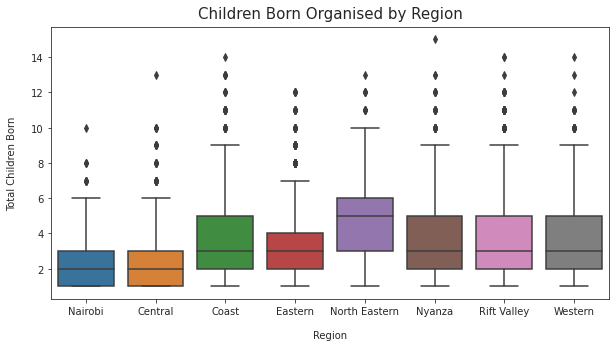

In [ ]:
# plotting a boxplot of V201 by V024 (Total Children Born vs Region respectively )

plt.figure(figsize=(10, 5))
sns.boxplot(x='region', y='total_kids', data = df_kdhs, saturation=0.65) 
plt.title("Children Born Organised by Region", fontsize=15, y=1.01) 
plt.ylabel("Total Children Born", labelpad=14)
plt.xlabel("Region", labelpad=14)
plt.show()

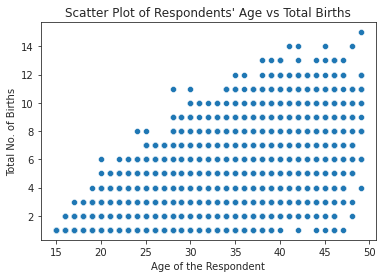

In [ ]:
# scatter plot of V201 by V012

sns.scatterplot(x="age", y="total_kids", data = df_kdhs) 
plt.title("Scatter Plot of Respondents' Age vs Total Births") 
plt.xlabel('Age of the Respondent') 
plt.ylabel('Total No. of Births');

In [ ]:
# previewing the correlation between the V201 and the V012 variables

df_corr = df_kdhs.corr()
df_corr

,birth_year,age,age_head,total_kids
birth_year,1.000000,-0.997621,-0.265888,-0.706269
age,-0.997621,1.000000,0.266827,0.710472
age_head,-0.265888,0.266827,1.000000,0.194750
total_kids,-0.706269,0.710472,0.194750,1.000000


*Age  of the respondent and the birth count are very highly correlated, with negative coefficient of 0.997* 

## <font color='#2F4F4F'>3. Summary of Findings</font>

**Preliminaries:**
1. Original dataset had 20,964 records with 1,100 features, most of which were irrelevant for our research and which we dropped to remain with only 8 variables.

2. Only one variable, "age of household head" had one null entry in element index (array([3768]),). we replaced this with the average of the ages in the column which is in 37.958116681772644.

3. We had a total of 6,015 duplicated records, some as many as five times. We confirm this with the unique record identifier field `case_id`. We will therefore proceed to drop them to have a resultant dataframe with 14,949 unique records.

**Focused Findings:**
- From the histograms, we notice that though both the age of the respondent and the age of household head are skewed, respondents is more skewed to the right than that of the household head.
- Rift Valley has the highest number of respondents followed by Eastern region. Nairobi region comes last with only 428 respondents.
- Majority of the respondents have attained Primary School Education while minority have Higher Level.
- More Children are born in rural residency as compared to Urban.
- Most children are born to respondents who have no education as compared to those who have at least Primary Level and higher. 
- Norrth Eastern REgion takes the lead in terms of total children born. Nairobi and Central come in last.
- More children are born to older women than younger ones.

**Acknowledgements:**
* **Data Source : https://bit.ly/3j317wO**
* Many thanks to [AfterWork Data Science](https://afterwork.ai/) Fellowship for the opportunity to train and exercise on this dataset.